# EART97012  <a class="tocSkip">
    
# Geophysical Inversion <a class="tocSkip">   
    
## Lecture 6 <a class="tocSkip">  
    
### Homework Exercises <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Rank-of-the-product-of-two-matrices-(and-the-outer-product-of-two-vectors)" data-toc-modified-id="Homework---Rank-of-the-product-of-two-matrices-(and-the-outer-product-of-two-vectors)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Rank of the product of two matrices (and the outer-product of two vectors)</a></span></li><li><span><a href="#Homework---A-simple-mixed-determined-problem-[solved-by-hand-and-using-the-pseudo-inverse]" data-toc-modified-id="Homework---A-simple-mixed-determined-problem-[solved-by-hand-and-using-the-pseudo-inverse]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - A simple mixed determined problem [solved by hand and using the pseudo-inverse]</a></span></li><li><span><a href="#Homework---A-&quot;least-squares&quot;-and-minimum-norm-solution-to-a-simple-$2\times-2$-case" data-toc-modified-id="Homework---A-&quot;least-squares&quot;-and-minimum-norm-solution-to-a-simple-$2\times-2$-case-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - A "least squares" and minimum norm solution to a simple $2\times 2$ case</a></span></li><li><span><a href="#Homework---Lagrange-multiplier-derivation-of-minimal-norm-solution" data-toc-modified-id="Homework---Lagrange-multiplier-derivation-of-minimal-norm-solution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Lagrange multiplier derivation of minimal-norm solution</a></span></li><li><span><a href="#Homework---Differentiation-of-inner-products" data-toc-modified-id="Homework---Differentiation-of-inner-products-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Differentiation of inner products</a></span></li><li><span><a href="#Homework---Curve-fitting---response-to-outliers-[read-through]" data-toc-modified-id="Homework---Curve-fitting---response-to-outliers-[read-through]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Curve-fitting - response to outliers [read-through]</a></span></li><li><span><a href="#Homework---Tomography-example---rank-and-null-space" data-toc-modified-id="Homework---Tomography-example---rank-and-null-space-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Tomography example - rank and null space</a></span></li><li><span><a href="#Homework---Tomography-example---solution-via-the-pseudo-inverse" data-toc-modified-id="Homework---Tomography-example---solution-via-the-pseudo-inverse-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Tomography example - solution via the pseudo-inverse</a></span></li><li><span><a href="#Homework---Damped-least-squares-applied-to-the-tomography-example" data-toc-modified-id="Homework---Damped-least-squares-applied-to-the-tomography-example-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - Damped least squares applied to the tomography example</a></span></li></ul></li></ul></div>

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

Recall that I use the notation 
$A\boldsymbol{x} = \boldsymbol{b}$ and $G\boldsymbol{m} = \boldsymbol{d}$ interchangeably

## Homework - Rank of the product of two matrices (and the outer-product of two vectors)

We stated in the lecture that a matrix product always has a rank that is less than or equal to the smallest rank of any of the constituent  matrices.    

For gave the  example of  the  outer  product  $\boldsymbol{a}\boldsymbol{b}^T$  of  two column  vectors  must  be  rank  1 because vectors are only rank 1. 

Establish the second of these analytically, and test the first with some examples and use of `numpy`

## Homework - A simple mixed determined problem [solved by hand and using the pseudo-inverse]

Consider the problem from the lecture

$$
\begin{pmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
0 & 2 & 2 \\
0 & 3 & 3
\end{pmatrix}
\begin{pmatrix}
m_1\\
m_2\\
m_3
\end{pmatrix}
=
\begin{pmatrix}
1\\
2\\
2\\
3
\end{pmatrix}.
$$

Can you come up with a sensible looking "solution" to this problem by considering the under- and over-determined components separately?

Hint: consider problems for $m_1$ and both $m_2$ and $m_3$ separately, and think about what the least squares and minimum norm solution would be for each.

Once you have found the solution "by-hand", try using the pseudo-inverse $A^+$ which you can find using the function `np.linalg.pinv(A)`

In [21]:
m = 10
n = 15
p = 12

A = np.random.random((m, n))
B = np.random.random((n, p))
print(f"Rank of matrix A is {np.linalg.matrix_rank(A)}")
print(f"Rank of matrix B is {np.linalg.matrix_rank(B)}")
print(f"Rank of matrix AB is {np.linalg.matrix_rank(A @ B)}")

Rank of matrix A is 10
Rank of matrix B is 12
Rank of matrix AB is 10


## Homework - A "least squares" and minimum norm solution to a simple $2\times 2$ case

In the L2 homework we considered the case 

$$
\left(
  \begin{array}{rr}
    2 & 3 \\
    4 & 6 
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y
  \end{array}
\right) = \left(
  \begin{array}{c}
    4 \\
    7
  \end{array}
\right),
$$

plotting the two constraints to make the point that this system has no solution:

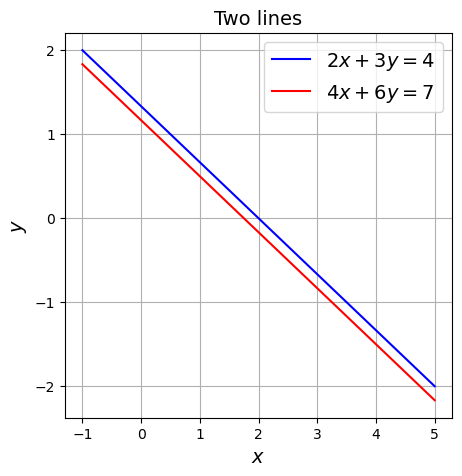

In [2]:
# consider the following situation
x = np.linspace(-1,5,100)
y1 = -(2./3.)*x + (4./3.)
y2 = -(4./6.)*x + (7./6.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=4$')
ax1.plot(x,y2,'r', label='$4x+6y=7$')

ax1.legend(loc='best', fontsize=14);

What do you think the least square and minimum norm solution is in this case?

Note that solution 1 is (I think) the obvious solution.

I also present a second solution afterwards which gives a slightly different answer.

## Homework - Lagrange multiplier derivation of minimal-norm solution

Recall we had the Lagrangian function
$$
\mathcal{L}(\boldsymbol{m}, \boldsymbol{\lambda}) :=  \boldsymbol{m}^T\boldsymbol{m} - \boldsymbol{\lambda}^T (G\boldsymbol{m} - \boldsymbol{d})
$$

where $\boldsymbol{\lambda}$ is the Lagrange multiplier that is introduced to enforce the constraint - here the constraint is vector values and so $\boldsymbol{\lambda}$ is a vector of Lagrange multipliers. 

We stated that 

$$\boldsymbol{0}=\nabla_{\boldsymbol{m}}\mathcal{L} = 2\boldsymbol{m} - G^T\boldsymbol{\lambda}$$

Consider a simple example to convince yourself this is true:

start with 

$$G =
\begin{pmatrix}
G_{11} & G_{12}\\
G_{21} & G_{22}
\end{pmatrix},\quad
\boldsymbol{m} = 
\begin{pmatrix}
m_1\\
m_2
\end{pmatrix},\quad
\boldsymbol{d} = 
\begin{pmatrix}
d_1\\
d_2
\end{pmatrix},\quad
\boldsymbol{\lambda} = 
\begin{pmatrix}
\lambda_1\\
\lambda_2
\end{pmatrix}
$$

write out $\mathcal{L}$ in full, i.e. perform the relevant matrix/vector arithmetic to compute the resulting scalar quantity, compute the gradient, and demontrate that the result is equal to $2\boldsymbol{m} - G^T\boldsymbol{\lambda}$.

## Homework - Differentiation of inner products 

Suppose that $\boldsymbol{a}$ and $\boldsymbol{b}$ are both functions of $\boldsymbol{x}$. Suppose $\boldsymbol{a}$ and $\boldsymbol{b}$ are vectors of length $m$, and $\boldsymbol{x}$ are vectors of length $n$.

What is

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right)$$

?

First note the object inside the bracket is the inner (or dot) product of the two vectors, and so is itself a scalar.

The derivative (or gradient) w.r.t. $\boldsymbol{x}$ is a vector the same length as $\boldsymbol{x}$.

<br>

The answer (if you work it out component by component) turns out to be equivalent to

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right) 
=\left(\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{b} +
\left(\frac{\partial \boldsymbol{b}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{a}$$

The differentials $\partial \boldsymbol{a}/\partial \boldsymbol{x}$ and  $\partial \boldsymbol{a}/\partial \boldsymbol{x}$ are both $m\times n$ matrices, so that their
transposes are $n\times m$. 

Thus the products 
$(\partial \boldsymbol{a}^T/\partial \boldsymbol{x}) \boldsymbol{b}$ and  $(\partial \boldsymbol{a}^T/\partial \boldsymbol{x}) \boldsymbol{a}$
are both column vectors of length $n$ as 
required.    Note  that  it  does  not  matter  if  we  differentiate  a  vector  and  then  transpose  the 
result, or if we transpose the vector before differentiation - both generate the same outcome. 

##  Homework - Curve-fitting - response to outliers [read-through]

Here we are going to fit a *linear* line to some invented data, and see what happens if we create an outlier - how much is the slope of the best-fit line impacted?

As numpy's polyfit function only has the option to minimise the 2 norm, we have to do some work ourselves to create an approach that minimses other norms - so just read through the following solution.

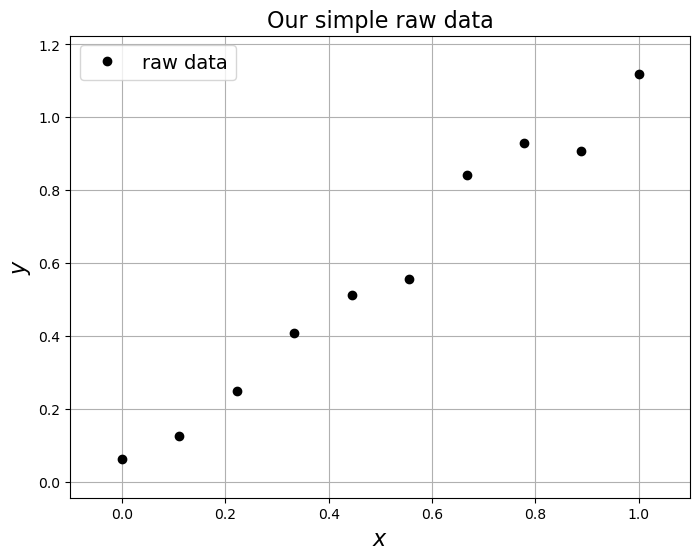

In [3]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.linspace(0,1,10)
yi = xi +  0.2 * np.random.random((10,))

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.07624061 0.03329278]


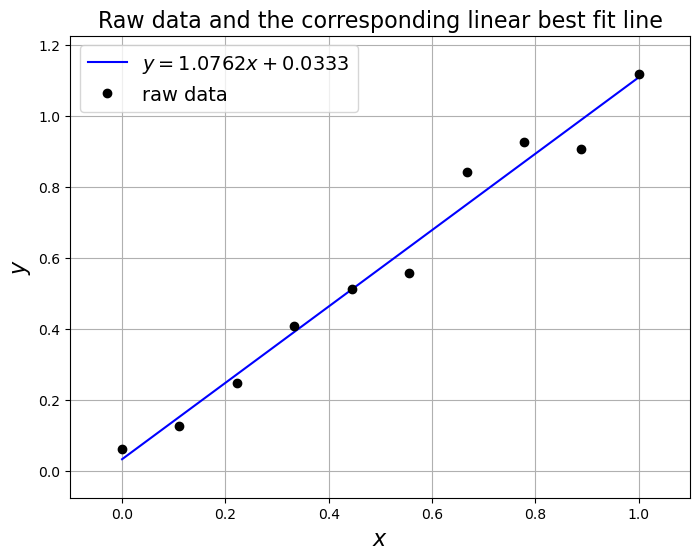

In [4]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

We can code this up ourselves using SciPy, and in doing so check out code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line.

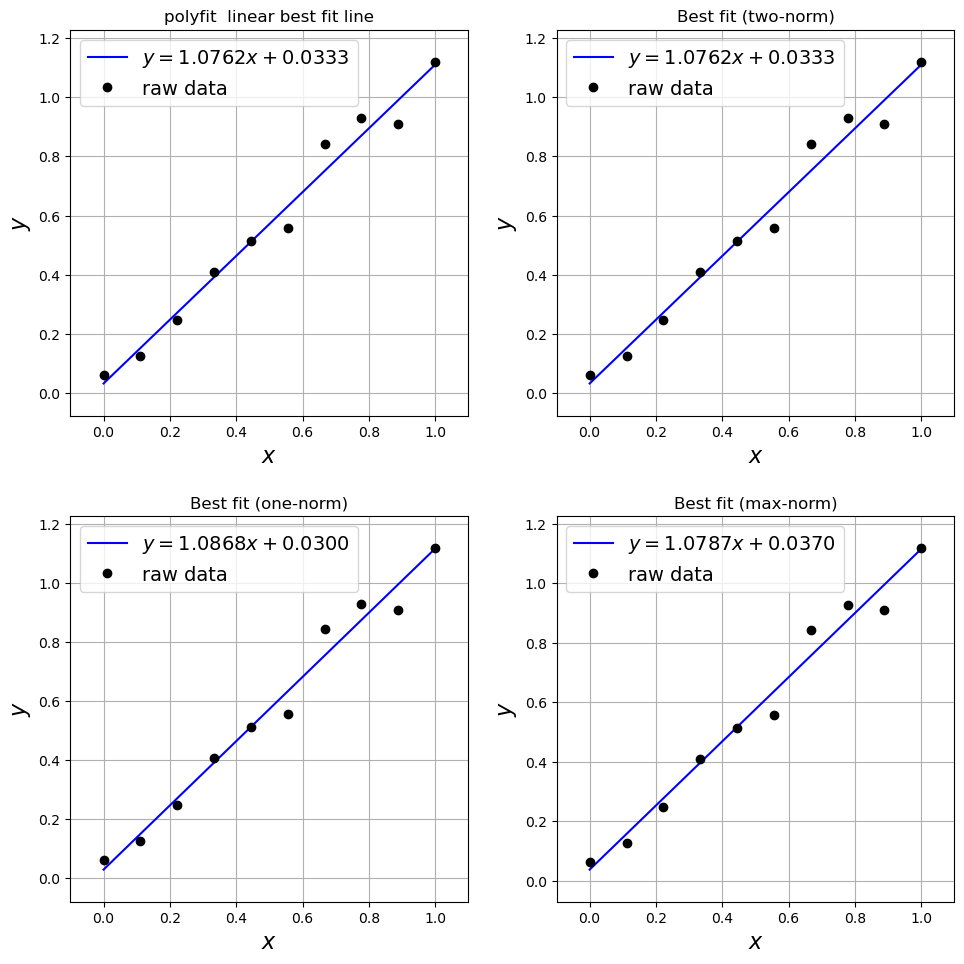

In [5]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

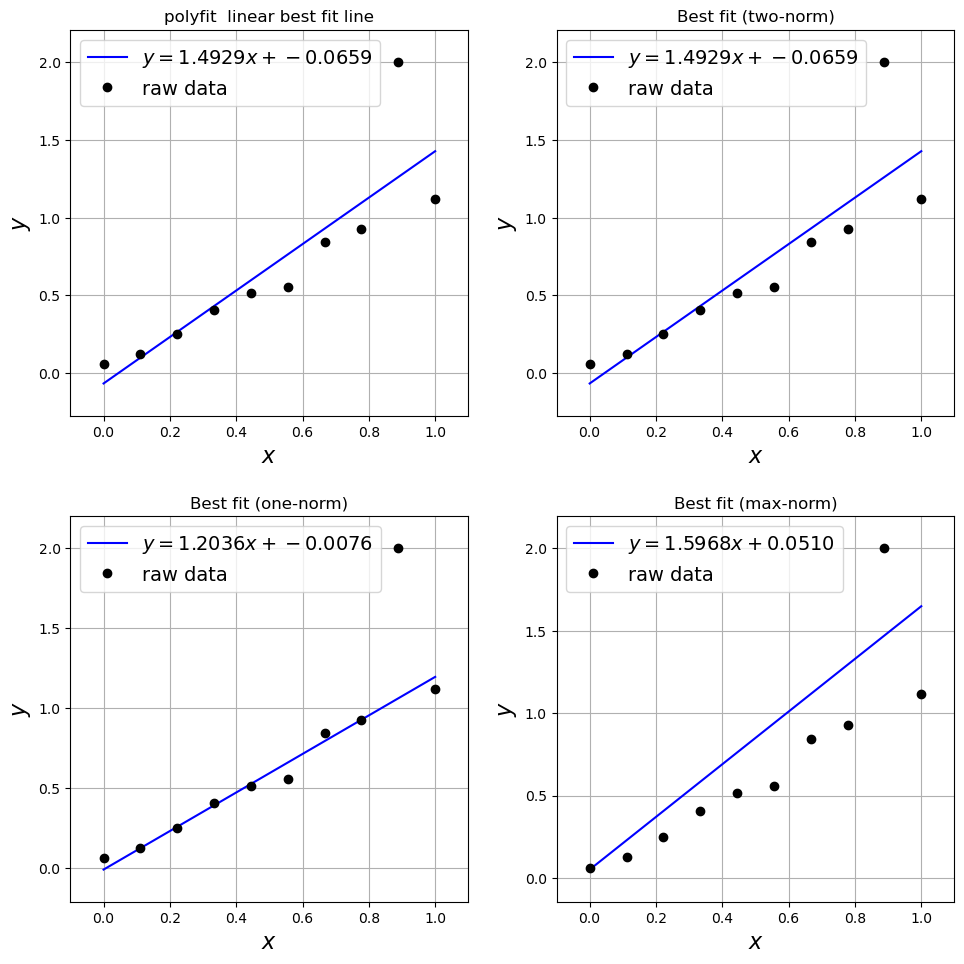

In [6]:
#perturb one of the entries

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.


## Homework - Tomography example - rank and null space

In the lecture we introduced the following problem as an example of a ***mixed-determined*** problem motivated by stright ray tomography.

$$
\begin{pmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots \\
x_9
\end{pmatrix}
=
\begin{pmatrix}
T_1\\
T_2\\
\vdots \\
T_6
\end{pmatrix}
$$



We saw a $4\times 4$ version of this problem in an earlier lecture.

To arrive at this simplified version of the problem, we will assume a body containing nine uniform blocks of 
unit size, arranged in a $3 \times 3$ grid, with values labelled 1 to 9 starting top left, and we will only consider ray paths that are perpendicular to the block boundaries so that refraction can be ignored and all the ray paths are straight. Imagine the slightly smaller version of this problem:

<img src="./figures/straight_ray_tomog_schematic.png" width=300x>


Now, let the slowness of each block be $x_j$, let's simplify by assuming that the size $h=1$, and the total travel time across the model be $T_i$, then the following equations relate the travel times to the slownesses 

$$\begin{align*}
T_1 &= x_1 + x_2 + x_3\\
T_2 &= x_4 + x_5 + x_6\\
& \vdots \\
T_6 &= x_3 + x_6 + x_9
\end{align*}
$$

Given the six measurements, the inverse problem is to determine information 
about the nine slownesses $x_1, \ldots x_9$.

The equation of condition for this system is 


$$
\begin{pmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots \\
x_9
\end{pmatrix}
=
\begin{pmatrix}
T_1\\
T_2\\
\vdots \\
T_6
\end{pmatrix}
$$

<br>

We can see here why the matrix $G$ is sometimes called the *sensitivity matrix*. 

The element in the $i$-th row and $j$-th column gives the sensitivity $\partial T_i/\partial x_j$ of the $i$-th measurement to a change in the $j$-th model variable.  

So, for example, the sixth measurement is only sensitive to $x_3$, $x_6$ and $x_9$, and it is equally sensitive to each of these variables.  

Note that when $\partial T_i/\partial x_j=0$  a change in the slowness $x_j$  will not affect the value of the travel time $T_i$, thus we can find no information about the value of $x_j$ from the measured value of $T_i$.

<br>

Let's suppose that there are no errors in the observations, and suppose further than the travel time for all six observations, i.e. along every row and every column, is equal to 6 units ($T_i=6\; \forall i$).  

Then clearly a homogeneous "model" (or solution vector), for which the slowness is each of the nine blocks is 2 will satisfy the data exactly. We can write this as 

$$
\begin{pmatrix}
2 & 2 & 2 \\
2 & 2 & 2 \\
2 & 2 & 2
\end{pmatrix}
$$


However, note that the following solutions also satisfy the data exactly 

$$
\begin{pmatrix}
1 & 2 & 3 \\
2 & 2 & 2 \\
3 & 2 & 1 
\end{pmatrix},\quad
\begin{pmatrix}
-2 & 0 & 8 \\
-2 & 6 & 2 \\
10 & 0 & -4 
\end{pmatrix},\quad
\begin{pmatrix}
1 & 2 & 3 \\
2 & 2 & 2 \\
3 & 2 & 1 
\end{pmatrix},
$$

we've reordered the 9 solution values which we write as a column vector when specifying our linear system into $3\times 3$ matrices here so you can more easily map them onto the 2D physical solution domain.

The following are also solutions
$$
\begin{pmatrix}
2+\alpha & 2-\alpha & 2 \\
2-\alpha & 2+\alpha & 2 \\
2 & 2 & 2 
\end{pmatrix}, \quad
\begin{pmatrix}
2 & 2 & 2 \\
2 & 2+\beta & 2-\beta \\
2 & 2-\beta & 2+\beta
\end{pmatrix},\quad
$$
where $\alpha$ and $\beta$ are arbitrary constants.


In this  problem therefore, there are infinitely many model parameters that satisfy the data. 

Some of these may not satisfy other constraints on the model parameters - for example, the slowness cannot be negative.  

But even with external constraints, in a problem such as this there will still be infinitely many models that satisfy the data exactly. 

<br>

**Questions**

Use `numpy` to compute the rank of this matrix. What dimension do we expect the null space to be?

Starting from the last two of these example solutions, can you figure out an appropriate number of linearly independent vectors that span the the null space of $G$?

Can you find a basis for the null space?

## Homework - Tomography example - solution via the pseudo-inverse

In class we introduced the concept of the data potentially containing errors, i.e. if instead of all data values being 6, consider the case with

$$ \boldsymbol{T} = (6.07, 6.07, 5.77, 5.93, 5.93, 6.03)^T $$

We stated tht now, even though there are fewer data than model parameters, there is no model that fits the  data exactly.  We can see this because it should be the case from $G$ that

$$ T_1  + T_2  + T_3  = T_4  + T_5  + T_6$$  

whereas for this data

$$ T_1 + T_2  + T_3  = 17.91, \qquad T_4 + T_5  + T_6  = 17.89 $$

so that, with these data, there can be no solution. 

<br><br>

Use the pseudo inverse computed using `np.linalg.pinv` to find a solution. 

## Homework - Damped least squares applied to the tomography example

Consider again the tomography example from the previous exercise with noisy data.

Now try solving this problem using the damped least squares approach and show that as $\mu$ tends to zero we recover the same solution as found in the previous question using the generalised inverse.